In [1115]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats

pd.set_option('float_format', '{:.2f}'.format)

In [1116]:
prefix  = "../data/"

df_demographic = pd.read_csv(prefix+"DemographicData_ZCTAs.csv")
df_economic = pd.read_csv(prefix+"EconomicData_ZCTAs.csv")
df_geocode = pd.read_csv(prefix+"df_geocode.csv")
df_tests = pd.read_csv(prefix+"test_data.csv")
df_transactional = pd.read_csv(prefix+"transactional_data.csv",sep=";",decimal=",")

# Sanity check

## Sanity check df_demographic

In [1117]:
df_demographic.head(5)

,Unnamed: 0,Id,GeographicAreaName,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
0,0,8600000US35004,ZCTA5 35004,12045,94.10,805,1075,898,477,578,2088,1628,1200,886,683,1017,534,176,35.50
1,1,8600000US35005,ZCTA5 35005,7344,86.10,504,453,511,499,214,788,795,968,612,561,798,485,156,44.00
2,2,8600000US35006,ZCTA5 35006,2883,108.20,96,153,303,129,156,183,367,430,296,260,280,201,29,47.20
3,3,8600000US35007,ZCTA5 35007,26332,95.00,1936,1992,1837,1762,1376,3119,3849,3907,1665,1323,2096,1106,364,37.70
4,4,8600000US35010,ZCTA5 35010,20613,90.50,1306,1465,944,1217,1128,2513,2106,2950,1512,1472,2421,1155,424,42.60


### Correção de nome das colunas

In [1118]:
df_demographic.columns = [x.replace(" ","").replace("(","").replace(")","").replace("_","") for x in df_demographic.columns] # Renomeando as colunas 

Descartando a coluna Unnamed:0, pois já o dataframe já contém index

In [1119]:
df_demographic = df_demographic.iloc[:,1:]

### Verificação de nulos

In [1120]:
df_demographic.isnull().sum()

Id                              0
GeographicAreaName              0
TotalPopulation                 0
SexRatiomalesper100females    500
PopulationUnder5Years           0
Population5to9Years             0
Population10to14Years           0
Population15to19Years           0
Population20to24Years           0
Population25to34Years           0
Population35to44Years           0
Population45to54Years           0
Population55to59Years           0
Population60to64Years           0
Population65to74Years           0
Population75to84Years           0
Population85YearsAndOver        0
MedianAgeInYears              569
dtype: int64

In [1121]:
print(f"Como vemos, cerca de {((100*df_demographic[df_demographic.isna().any(axis=1)].shape[0])/df_demographic.shape[0]):.3f}\
% das {df_demographic.shape[0]} linhas contém dados nulos")

Como vemos, cerca de 1.863% das 33120 linhas contém dados nulos


Como não é possível obter os dados faltantes, as linhas que contém os dados faltantes serão excluidas do dataframe

In [1122]:
df_demographic = df_demographic.dropna(how='any') # Dropando os valores nulos

Como é possível verificar, não constam mais valores nulos em nenhuma coluna do dataframe

In [1123]:
df_demographic.isnull().sum()

Id                            0
GeographicAreaName            0
TotalPopulation               0
SexRatiomalesper100females    0
PopulationUnder5Years         0
Population5to9Years           0
Population10to14Years         0
Population15to19Years         0
Population20to24Years         0
Population25to34Years         0
Population35to44Years         0
Population45to54Years         0
Population55to59Years         0
Population60to64Years         0
Population65to74Years         0
Population75to84Years         0
Population85YearsAndOver      0
MedianAgeInYears              0
dtype: int64

### Verificação do formato dos dados

In [1124]:
df_demographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32503 entries, 0 to 33119
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          32503 non-null  object 
 1   GeographicAreaName          32503 non-null  object 
 2   TotalPopulation             32503 non-null  int64  
 3   SexRatiomalesper100females  32503 non-null  float64
 4   PopulationUnder5Years       32503 non-null  int64  
 5   Population5to9Years         32503 non-null  int64  
 6   Population10to14Years       32503 non-null  int64  
 7   Population15to19Years       32503 non-null  int64  
 8   Population20to24Years       32503 non-null  int64  
 9   Population25to34Years       32503 non-null  int64  
 10  Population35to44Years       32503 non-null  int64  
 11  Population45to54Years       32503 non-null  int64  
 12  Population55to59Years       32503 non-null  int64  
 13  Population60to64Years       325

É possível verificar que as colunas "Id" e "GeographicAreaName" são do tipo "object", e necessitam ser convertidas para tipos específicos

In [1125]:
df_demographic["Id"] = df_demographic["Id"].astype(pd.StringDtype())
df_demographic["GeographicAreaName"] = df_demographic["GeographicAreaName"].astype(pd.StringDtype())

Com isso, todos os Dtype(s) do dataframe foram corrigidos

In [1126]:
df_demographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32503 entries, 0 to 33119
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          32503 non-null  string 
 1   GeographicAreaName          32503 non-null  string 
 2   TotalPopulation             32503 non-null  int64  
 3   SexRatiomalesper100females  32503 non-null  float64
 4   PopulationUnder5Years       32503 non-null  int64  
 5   Population5to9Years         32503 non-null  int64  
 6   Population10to14Years       32503 non-null  int64  
 7   Population15to19Years       32503 non-null  int64  
 8   Population20to24Years       32503 non-null  int64  
 9   Population25to34Years       32503 non-null  int64  
 10  Population35to44Years       32503 non-null  int64  
 11  Population45to54Years       32503 non-null  int64  
 12  Population55to59Years       32503 non-null  int64  
 13  Population60to64Years       325

### Verificação de registros duplicados

In [1127]:
# Aqui verificamos se em geral existe alguma linha totalmente igual a outra, com os valores
#de todas as colunas iguais
df_demographic.duplicated().sum()

0

In [1128]:
# Aqui verificamos se existe algum Id duplicado
df_demographic["Id"].duplicated().sum()

0

In [1129]:
# Aqui verificamos se existem registros duplicados,
#excluindo o Id e levando em consideração apenas as variáveis numéricas
df_demographic[df_demographic.columns[1:]].duplicated().sum()

0

### Verificação dos outliers

In [1130]:
df_demographic.describe()

,TotalPopulation,SexRatiomalesper100females,PopulationUnder5Years,Population5to9Years,Population10to14Years,Population15to19Years,Population20to24Years,Population25to34Years,Population35to44Years,Population45to54Years,Population55to59Years,Population60to64Years,Population65to74Years,Population75to84Years,Population85YearsAndOver,MedianAgeInYears
count,32503.00,32503.00,32503.00,32503.00,32503.00,32503.00,32503.00,32503.00,32503.00,32503.00,32503.00,32503.00,32503.00,32503.00,32503.00,32503.00
mean,10090.08,116.87,612.57,625.54,649.97,659.21,684.25,1397.67,1273.12,1307.58,672.80,624.96,919.97,467.14,195.29,42.70
std,14789.83,1485.83,1001.88,1000.97,1031.72,1056.97,1244.84,2340.57,2005.38,1935.22,943.71,861.29,1274.94,684.79,314.38,9.09
min,3.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.90
25%,765.00,91.30,34.00,38.00,41.00,41.00,34.00,72.00,76.00,94.00,56.00,56.00,85.00,41.00,11.00,37.10
50%,2947.00,98.40,155.00,168.00,183.00,180.00,158.00,314.00,330.00,385.00,221.00,212.00,318.00,159.00,54.00,42.00
75%,13826.00,107.90,770.00,804.00,837.00,844.00,806.00,1672.00,1639.00,1781.00,946.00,888.00,1303.00,640.00,249.00,47.60
max,128294.00,265600.00,17564.00,14784.00,12289.00,13357.00,23027.00,28192.00,23166.00,18058.00,7392.00,7018.00,26465.00,16934.00,4633.00,98.20


Como verficamos acima, a primeira vista, na coluna "SexRatiomalesper100females" existem dados muito incomuns, tanto nos valores máximos quanto mínimos. É possível evidenciar locais com 265600 homens para cada mulher e 0.50 homens para cada mulher, o que é muito improvavel 

Em vista disso, iremos remove-los, utilizando a técnica z-score

<AxesSubplot:xlabel='SexRatiomalesper100females'>

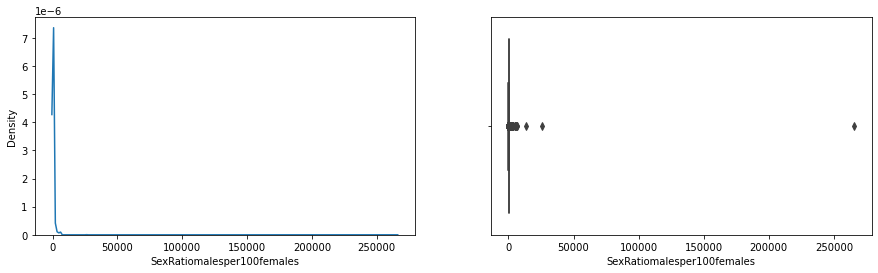

In [1131]:
fig, ax = plt.subplots(1,2,figsize=(15, 4))
sns.kdeplot(data=df_demographic, x="SexRatiomalesper100females", ax=ax[0])
sns.boxplot(data=df_demographic, x="SexRatiomalesper100females", ax=ax[1])

É possível evidenciar graficamente os outliers, logo iremos remove-los utilizando a técnica zscore

In [1132]:
df_demographic["zscore"] = stats.zscore(df_demographic["SexRatiomalesper100females"])
df_demographic = df_demographic[(df_demographic["zscore"] < 3)&(df_demographic["zscore"] > -3)]

<AxesSubplot:xlabel='SexRatiomalesper100females'>

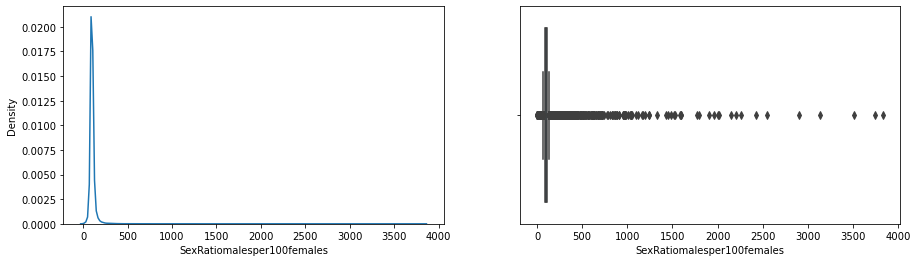

In [1133]:
fig, ax = plt.subplots(1,2,figsize=(15, 4))
sns.kdeplot(data=df_demographic, x="SexRatiomalesper100females", ax=ax[0])
sns.boxplot(data=df_demographic, x="SexRatiomalesper100females", ax=ax[1])

In [1134]:
df_demographic.describe()

,TotalPopulation,SexRatiomalesper100females,PopulationUnder5Years,Population5to9Years,Population10to14Years,Population15to19Years,Population20to24Years,Population25to34Years,Population35to44Years,Population45to54Years,Population55to59Years,Population60to64Years,Population65to74Years,Population75to84Years,Population85YearsAndOver,MedianAgeInYears,zscore
count,32492.00,32492.00,32492.00,32492.00,32492.00,32492.00,32492.00,32492.00,32492.00,32492.00,32492.00,32492.00,32492.00,32492.00,32492.00,32492.00,32492.00
mean,10092.85,106.13,612.78,625.75,650.19,659.40,684.42,1397.96,1273.40,1307.90,672.98,625.15,920.26,467.30,195.36,42.70,-0.01
std,14791.55,75.31,1001.99,1001.07,1031.82,1057.09,1245.02,2340.90,2005.65,1935.46,943.81,861.38,1275.06,684.86,314.41,9.09,0.05
min,3.00,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.90,-0.08
25%,765.00,91.30,34.00,38.00,41.00,41.00,33.75,72.00,76.00,94.00,56.00,56.00,85.00,41.00,11.00,37.10,-0.02
50%,2949.50,98.40,155.00,168.00,183.00,180.50,158.00,314.00,330.00,385.00,221.00,212.00,318.00,159.00,54.00,42.00,-0.01
75%,13830.50,107.90,770.00,804.00,837.25,844.00,806.25,1672.00,1639.00,1781.25,946.00,888.00,1303.25,640.00,249.00,47.60,-0.01
max,128294.00,3833.70,17564.00,14784.00,12289.00,13357.00,23027.00,28192.00,23166.00,18058.00,7392.00,7018.00,26465.00,16934.00,4633.00,98.20,2.50


Utilizei valores extremos no zscore para normalizar os dados, como vemos nos gráficos acima, a distribuição ainda se encontra fora do comum, no entanto agora os valores máximos e mínimos estão dentro do aceitável 

In [1135]:
df_demographic = df_demographic.drop(columns=["zscore"])

### Correção do index

In [1136]:
df_demographic = df_demographic.reset_index(drop=True)

## Sanity check df_economic

In [1137]:
df_economic.head(5)

,Unnamed: 0,id,Geographic Area Name,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore
0,0,8600000US35004,ZCTA5 35004,198,71,298,513,647,1117,529,945,245,61
1,1,8600000US35005,ZCTA5 35005,188,184,318,293,353,562,299,407,67,26
2,2,8600000US35006,ZCTA5 35006,71,20,117,104,154,176,124,194,51,7
3,3,8600000US35007,ZCTA5 35007,396,208,670,462,1173,1854,1578,2224,473,254
4,4,8600000US35010,ZCTA5 35010,700,610,1093,957,1056,1512,807,749,254,249


### Correção de nome das colunas

In [1138]:
df_economic.columns = [x.replace(" ","").replace("(","_").replace(")","") for x in df_economic.columns] # Renomeando as colunas 
df_economic=df_economic.rename(columns = {'id':'Id'}) # Renomeando apenas a coluna de Id para seguir o padrão do resto do dataframe

Descartando a coluna Unnamed:0, pois já o dataframe já contém index

In [1139]:
df_economic = df_economic.iloc[:,1:]

### Verificação de nulos

In [1140]:
df_economic.isnull().sum()

Id                                    0
GeographicAreaName                    0
TotalHouseholds_LessThan$10.000       0
TotalHouseholds_$10.000to$14.999      0
TotalHouseholds_$15.000to$24.999      0
TotalHouseholds_$25.000to$34.999      0
TotalHouseholds_$35.000to$49.999      0
TotalHouseholds_$50.000to$74.999      0
TotalHouseholds_$75.000to$99.999      0
TotalHouseholds_$100.000to$149.999    0
TotalHouseholds_$150.000to$199.999    0
TotalHouseholds_$200.000OrMore        0
dtype: int64

Como verificamos, nesse dataframe não está presente nenhum nulo. Podemos passar para a verificação dos formatos dos dados nas colunas

### Verificação do formato dos dados

In [1141]:
df_economic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629280 entries, 0 to 629279
Data columns (total 12 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Id                                  629280 non-null  object
 1   GeographicAreaName                  629280 non-null  object
 2   TotalHouseholds_LessThan$10.000     629280 non-null  int64 
 3   TotalHouseholds_$10.000to$14.999    629280 non-null  int64 
 4   TotalHouseholds_$15.000to$24.999    629280 non-null  int64 
 5   TotalHouseholds_$25.000to$34.999    629280 non-null  int64 
 6   TotalHouseholds_$35.000to$49.999    629280 non-null  int64 
 7   TotalHouseholds_$50.000to$74.999    629280 non-null  int64 
 8   TotalHouseholds_$75.000to$99.999    629280 non-null  int64 
 9   TotalHouseholds_$100.000to$149.999  629280 non-null  int64 
 10  TotalHouseholds_$150.000to$199.999  629280 non-null  int64 
 11  TotalHouseholds_$200.000OrMore      629

É possível verificar que as colunas "Id" e "GeographicAreaName" são do tipo "object", e necessitam ser convertidas para tipos específicos

In [1142]:
df_economic["Id"] = df_economic["Id"].astype(pd.StringDtype())
df_economic["GeographicAreaName"] = df_economic["GeographicAreaName"].astype(pd.StringDtype())

Com isso, todos os Dtype(s) do dataframe foram corrigidos

In [1143]:
df_economic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629280 entries, 0 to 629279
Data columns (total 12 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Id                                  629280 non-null  string
 1   GeographicAreaName                  629280 non-null  string
 2   TotalHouseholds_LessThan$10.000     629280 non-null  int64 
 3   TotalHouseholds_$10.000to$14.999    629280 non-null  int64 
 4   TotalHouseholds_$15.000to$24.999    629280 non-null  int64 
 5   TotalHouseholds_$25.000to$34.999    629280 non-null  int64 
 6   TotalHouseholds_$35.000to$49.999    629280 non-null  int64 
 7   TotalHouseholds_$50.000to$74.999    629280 non-null  int64 
 8   TotalHouseholds_$75.000to$99.999    629280 non-null  int64 
 9   TotalHouseholds_$100.000to$149.999  629280 non-null  int64 
 10  TotalHouseholds_$150.000to$199.999  629280 non-null  int64 
 11  TotalHouseholds_$200.000OrMore      629

### Verificação de registros duplicados

In [1144]:
# Aqui verificamos se em geral existe alguma linha totalmente igual a outra, com os valores
#de todas as colunas iguais
df_economic.duplicated().sum()

596160

In [1145]:
# Aqui verificamos se existe valor duplicados ans colunas identificadoras
df_economic[["Id","GeographicAreaName"]].duplicated().sum()

596160

In [1146]:
# Aqui verificamos se existem registros duplicados,
#excluindo o Id e levando em consideração apenas as variáveis numéricas
df_economic[df_economic.columns[1:]].duplicated().sum()

596160

In [1147]:
print(f"Cerca de {((100*df_economic.duplicated().sum())/df_economic.shape[0]):.3f} % dos dados estão duplicados")

Cerca de 94.737 % dos dados estão duplicados


Em vista disso é necessário remover os dados duplicados

In [1148]:
df_economic = df_economic.drop_duplicates()

### Verificação de outliers

In [1149]:
df_economic.describe()

,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore
count,33120.00,33120.00,33120.00,33120.00,33120.00,33120.00,33120.00,33120.00,33120.00,33120.00
mean,230.23,160.92,331.45,330.24,451.80,631.31,465.69,553.14,247.10,280.06
std,441.47,276.90,520.93,503.57,673.92,927.03,696.96,888.38,469.37,684.82
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,11.00,9.00,25.00,25.00,36.00,49.00,31.00,29.00,6.00,3.00
50%,55.00,45.00,98.00,100.00,139.00,195.00,137.00,135.00,40.00,29.00
75%,257.00,188.00,415.00,416.00,578.00,831.00,611.00,681.25,254.00,202.00
max,7901.00,3942.00,5410.00,4349.00,5988.00,8466.00,6491.00,8705.00,6095.00,11968.00


A primeira vista, o único valor discrepante que vemos é pessoas com household de mais de 200 mil dolares, logo vale a pena verificar a distribuição, pois são valores muito incomuns

<AxesSubplot:xlabel='TotalHouseholds_$200.000OrMore'>

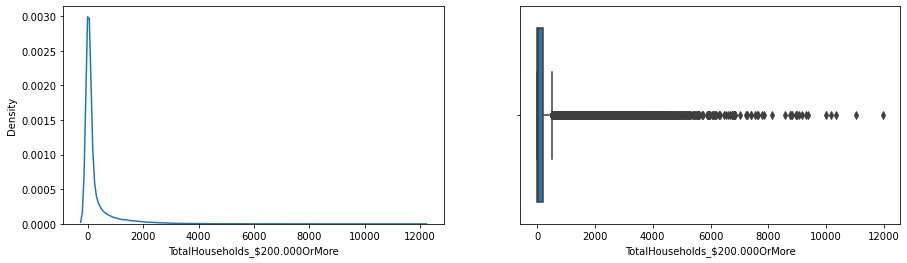

In [1150]:
fig, ax = plt.subplots(1,2,figsize=(15, 4))
sns.kdeplot(data=df_economic, x="TotalHouseholds_$200.000OrMore", ax=ax[0])
sns.boxplot(data=df_economic, x="TotalHouseholds_$200.000OrMore", ax=ax[1])

In [1151]:
df_economic["zscore"] = stats.zscore(df_economic["TotalHouseholds_$200.000OrMore"])
df_economic = df_economic[(df_economic["zscore"] < 3)&(df_economic["zscore"] > -3)]

<AxesSubplot:xlabel='TotalHouseholds_$200.000OrMore'>

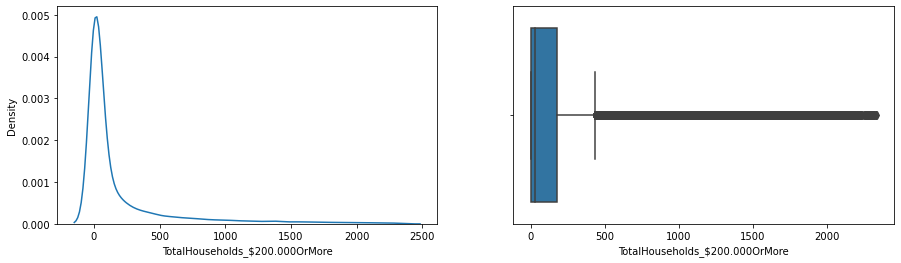

In [1152]:
fig, ax = plt.subplots(1,2,figsize=(15, 4))
sns.kdeplot(data=df_economic, x="TotalHouseholds_$200.000OrMore", ax=ax[0])
sns.boxplot(data=df_economic, x="TotalHouseholds_$200.000OrMore", ax=ax[1])

In [1153]:
df_economic.describe()

,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore,zscore
count,32349.00,32349.00,32349.00,32349.00,32349.00,32349.00,32349.00,32349.00,32349.00,32349.00,32349.00
mean,222.23,156.45,322.90,320.66,436.42,601.44,434.78,496.71,206.02,200.42,-0.12
std,436.65,273.26,518.34,500.40,666.37,902.67,660.38,791.23,368.82,399.21,0.58
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.41
25%,11.00,9.00,24.00,24.00,35.00,48.00,30.00,27.00,5.00,3.00,-0.40
50%,52.00,42.00,93.00,95.00,131.00,184.00,129.00,127.00,37.00,27.00,-0.37
75%,235.00,176.00,387.00,388.00,536.00,761.00,550.00,608.00,220.00,175.00,-0.15
max,7901.00,3633.00,5410.00,4349.00,5988.00,8466.00,6491.00,8705.00,3122.00,2334.00,3.00


Acredito não ser necessária a remoção de mais dados, pois tanto o df_economic quanto o df_demografic são dados de sensos de algumas cidades dos EUA, e após a remoção de valores extremos, ainda sim temos valores máximos e mínimos pequenos, pois eles podem pertencer a casos extremos, como cidades muito grandes, ou abandonadas.

In [1154]:
df_economic = df_economic.drop(columns=["zscore"])

### Correção do index

In [1155]:
df_economic = df_economic.reset_index(drop=True)

## Sanity check df_geocode

In [1156]:
df_geocode.head(5)

,Unnamed: 0,Lab Id,Address,Location,Zipcode
0,0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096","34.000319,-84.1629724",30096.00
1,1,L520,"1614 N JAMES ST, ROME, NY 13440","43.2311327,-75.4445363",13440.00
2,2,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034","47.7162786,-122.1838152",98034.00
3,3,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342","33.9093875,-84.3529096",30342.00
4,4,L545,"1204 IL HWY 164, OQUAWKA, IL 61469","40.9309925,-90.9437598",61469.00


### Correção do nome das colunas

In [1157]:
df_geocode.columns = [x.replace(" ","") for x in df_geocode.columns] # Renomeando as colunas 

Descartando a coluna Unnamed:0, pois já o dataframe já contém index

In [1158]:
df_geocode = df_geocode.iloc[:,1:]

### Verificação de valores nulos

In [1159]:
df_geocode.isnull().sum()

LabId       0
Address     0
Location    0
Zipcode     1
dtype: int64

In [1160]:
df_geocode[df_geocode.isna().any(axis=1)].shape[0]

1

In [1161]:
df_geocode[df_geocode.isna().any(axis=1)]

,LabId,Address,Location,Zipcode
83,-2,Unavailable,Unavailable,NaN


Como podemos ver é apenas uma linha com valores faltantes e além de o zip code estar faltando, o endereço por extenso e as coordenadas também estão, o que impossibilita a busca das informações através de uma API ou dataframe auxiliar com endereços. Logo é necessário remover a linha

In [1162]:
df_geocode = df_geocode.dropna(how='any') # Dropando os valores nulos

Como é possível verificar, não constam mais valores nulos em nenhuma coluna do dataframe

In [1163]:
df_geocode.isnull().sum()

LabId       0
Address     0
Location    0
Zipcode     0
dtype: int64

### Verificação do formato dos dados

In [1164]:
df_geocode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 118
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LabId     118 non-null    object 
 1   Address   118 non-null    object 
 2   Location  118 non-null    object 
 3   Zipcode   118 non-null    float64
dtypes: float64(1), object(3)
memory usage: 4.6+ KB


A coluna location deve se tornar duas colunas, latitude e longitude, visto que ela armazena dois valores, que deveriam estar no formato float, pois os dois são números reais

In [1165]:
def get_latitude(location):
    latitude = location.split(',')[0]
    return float(latitude)

def get_longitude(location):
    longitude = location.split(',')[1]
    return float(longitude)

df_geocode["Latitude"] = df_geocode["Location"].apply(get_latitude)
df_geocode["Longitude"] = df_geocode["Location"].apply(get_longitude)

In [1166]:
df_geocode["LabId"] = df_geocode["LabId"].astype(pd.StringDtype())
df_geocode["Address"] = df_geocode["Address"].astype(pd.StringDtype())
df_geocode["Zipcode"] = df_geocode["Zipcode"].astype("int64").astype(pd.StringDtype())

In [1167]:
# Removendo a coluna location
df_geocode = df_geocode[["LabId","Address","Zipcode","Latitude","Longitude"]]

In [1168]:
df_geocode.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 118
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LabId      118 non-null    string 
 1   Address    118 non-null    string 
 2   Zipcode    118 non-null    string 
 3   Latitude   118 non-null    float64
 4   Longitude  118 non-null    float64
dtypes: float64(2), string(3)
memory usage: 5.5 KB


### Verificação de registros duplicados

In [1169]:
# Aqui verificamos se em geral existe alguma linha totalmente igual a outra, com os valores
#de todas as colunas iguais
df_geocode.duplicated().sum()

0

In [1170]:
# Aqui verificamos se existe algum Id duplicado
df_geocode["LabId"].duplicated().sum()

0

In [1171]:
# Aqui verificamos se tem algum endereço que não seja único, e depois verificamos o zipcode 
#juntamente com latitude e longitude, visto que podem existir mais de um laboratório em 
#um zip code
df_geocode["Address"].duplicated().sum(),\
df_geocode[["Zipcode","Latitude","Longitude"]].duplicated().sum()

(0, 0)

### Verificação de outliers

Neste dataframe não é necessário a verificação de outliers, visto que ele é composto apenas por variáveis categóricas

### Correção do index

In [1172]:
df_geocode = df_geocode.reset_index(drop=True)

## Sanity check df_tests

In [1173]:
df_tests.head(5)

,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
0,70003237,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
1,70000638,"HEMOGRAMA, AUTOMATIZADO, SANGUE",CA,HEMATO,BLOOD COUNT,2.46
2,70001597,"FERRITINA, SORO",CA,CORELAB,IMMUNOHORMONE,2.11
3,70000103,"FERRO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE ...",CA,CORELAB,BIOCHEMISTRY,0.80
4,70000224,"CALCIO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE...",CA,CORELAB,BIOCHEMISTRY,1.02


### Correção de nome de colunas

In [1174]:
df_tests.columns = [x.replace(" ","") for x in df_tests.columns] # Renomeando as colunas 

### Verificação de nulos

In [1175]:
df_tests.isnull().sum()

CodItem        0
DescItem       0
Category       0
Family         0
Speciality     0
TestingCost    0
dtype: int64

Como não foi verificado nenhum valor nulo, não é necessário tratamento e podemos passar para a verificação do formato das colunas

### Verificação de formato dos dados

In [1176]:
df_tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CodItem      2002 non-null   int64  
 1   DescItem     2002 non-null   object 
 2   Category     2002 non-null   object 
 3   Family       2002 non-null   object 
 4   Speciality   2002 non-null   object 
 5   TestingCost  2002 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 94.0+ KB


Aqui é notável que a maioria das colunas estão no formato object e é necessário um casting 

In [1177]:
df_tests["CodItem"] = df_tests["CodItem"].astype(pd.StringDtype())
df_tests["DescItem"] = df_tests["DescItem"].astype(pd.StringDtype())
df_tests["Category"] = df_tests["Category"].astype(pd.StringDtype())
df_tests["Family"] = df_tests["Family"].astype(pd.StringDtype())
df_tests["Speciality"] = df_tests["Speciality"].astype(pd.StringDtype())

Com isso, todos os Dtype(s) do dataframe foram corrigidos

In [1178]:
df_tests.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2002 entries, 0 to 2001
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CodItem      2002 non-null   string 
 1   DescItem     2002 non-null   string 
 2   Category     2002 non-null   string 
 3   Family       2002 non-null   string 
 4   Speciality   2002 non-null   string 
 5   TestingCost  2002 non-null   float64
dtypes: float64(1), string(5)
memory usage: 94.0 KB


### Verifição de registros duplicados

In [1179]:
# Aqui verificamos se em geral existe alguma linha totalmente igual a outra, com os valores
#de todas as colunas iguais
df_tests.duplicated().sum()

0

In [1180]:
# Aqui verificamos se existe valor duplicados ans colunas identificadoras
df_tests["CodItem"].duplicated().sum()

1

In [1181]:
# Aqui verificamos se existe valor duplicados ans colunas identificadoras
df_tests[df_tests["CodItem"].duplicated()]

,CodItem,DescItem,Category,Family,Speciality,TestingCost
1968,70004701,PROCEDIMENTO DIAGNOSTICO EM PAINEL DE IMUNOIST...,PA,ANATOMO,IMMUNOHISTOCHEMISTRY,362.96


Como vemos, existe apenas uma linha duplicada, que será removida

In [1182]:
df_tests = df_tests.drop_duplicates(subset="CodItem", keep="last")

### Verificação dos outliers

Agora verificamos a existência de outliers no dataframe, caso detectados iremos removelos para que seja possível tirarmos conclusões mais claras a respeito dos dados. Iremos verificar abaixo

In [1183]:
df_tests.describe()

,TestingCost
count,2001.00
mean,77.62
std,145.96
min,0.00
25%,4.81
50%,21.14
75%,78.97
max,1762.46


<AxesSubplot:xlabel='TestingCost'>

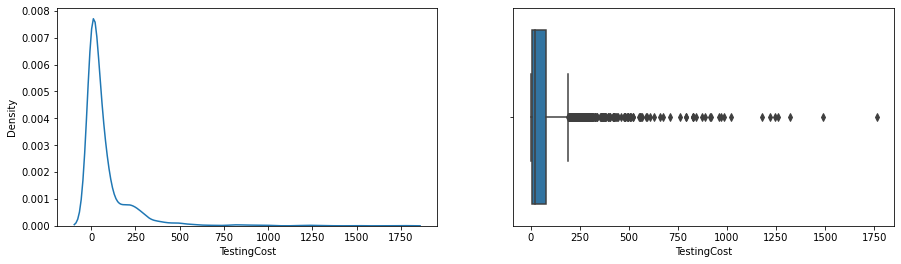

In [1184]:
fig, ax = plt.subplots(1,2,figsize=(15, 4))
sns.kdeplot(data=df_tests, x="TestingCost", ax=ax[0])
sns.boxplot(data=df_tests, x="TestingCost", ax=ax[1])

Como vemos, claramente temos outliers na unica coluna numérica presente neste dataframe, logo será necessário remove-los

In [1185]:
df_tests["zscore"] = stats.zscore(df_tests["TestingCost"])

In [1186]:
df_tests = df_tests[(df_tests["zscore"] < 1)&(df_tests["zscore"] > -1)]

<AxesSubplot:xlabel='TestingCost'>

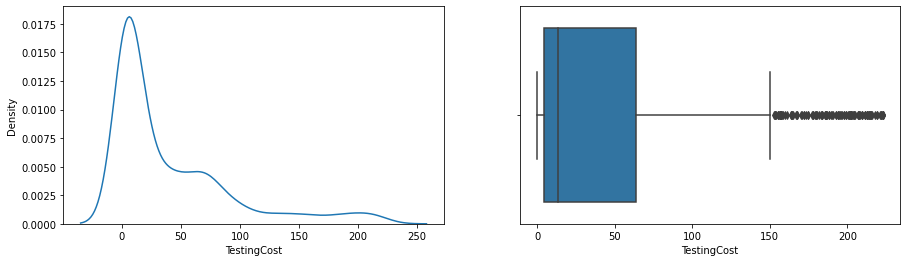

In [1187]:
fig, ax = plt.subplots(1,2,figsize=(15, 4))
sns.kdeplot(data=df_tests, x="TestingCost", ax=ax[0])
sns.boxplot(data=df_tests, x="TestingCost", ax=ax[1])

In [1188]:
df_tests.describe()

,TestingCost,zscore
count,1798.00,1798.00
mean,40.25,-0.26
std,52.05,0.36
min,0.00,-0.53
25%,4.43,-0.50
50%,13.66,-0.44
75%,63.41,-0.10
max,222.97,1.00


In [1189]:
df_tests = df_tests.drop(columns=["zscore"])

### Correção do index

In [1190]:
df_tests = df_tests.reset_index(drop=True)

## Sanity check df_transactional

In [1191]:
df_transactional.head(5)

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost
0,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70003237,9.00
1,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000638,13.00
2,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70001597,49.00
3,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000103,11.00
4,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000224,10.00


### Correção de nome das colunas

In [1192]:
df_transactional.columns = [x.replace(" ","") for x in df_transactional.columns] # Renomeando as colunas 

### Verificação de nulos

In [1193]:
df_transactional.isnull().sum()

PatientId        0
Gender           0
Dateofbirth      1
Dateofservice    0
ServiceId        0
LabId            0
CodItem          0
TestingCost      0
dtype: int64

In [1194]:
print(f"Como vemos, cerca de {((100*df_transactional[df_transactional.isna().any(axis=1)].shape[0])/df_demographic.shape[0]):.3f}\
% das {df_demographic.shape[0]} linhas contém dados nulos")

Como vemos, cerca de 0.003% das 32492 linhas contém dados nulos


In [1195]:
df_transactional[df_transactional.isna().any(axis=1)]

,PatientId,Gender,Dateofbirth,Dateofservice,ServiceId,LabId,CodItem,TestingCost
1253947,7659985004-1,F,NaN,2020-02-22,7659985004-2-1,L152,70000107,48.00


Apesar de ser apenas uma linha, por ser uma série temporal é melhor para não perdermos o dado, e apenas preenchê-lo. Para isso, usaremos uma técnica de interpolação. 

In [1196]:
df_transactional['Dateofbirth'] = df_transactional['Dateofbirth']\
    .interpolate(option="spline")\
        .fillna(method='bfill')

Como é possível verificar, não constam mais valores nulos em nenhuma coluna do dataframe

In [1197]:
df_transactional.isnull().sum()

PatientId        0
Gender           0
Dateofbirth      0
Dateofservice    0
ServiceId        0
LabId            0
CodItem          0
TestingCost      0
dtype: int64

### Verificação de formato de dados

In [1198]:
df_transactional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2355241 entries, 0 to 2355240
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   PatientId      object 
 1   Gender         object 
 2   Dateofbirth    object 
 3   Dateofservice  object 
 4   ServiceId      object 
 5   LabId          object 
 6   CodItem        int64  
 7   TestingCost    float64
dtypes: float64(1), int64(1), object(6)
memory usage: 143.8+ MB


In [1199]:
# Corrigindo o(s) valor(es) que deveria(m) ser do tipo String
df_transactional["PatientId"] = df_transactional["PatientId"].astype(pd.StringDtype())
df_transactional["Gender"] = df_transactional["Gender"].astype(pd.StringDtype())
df_transactional["ServiceId"] = df_transactional["ServiceId"].astype(pd.StringDtype())
df_transactional["LabId"] = df_transactional["LabId"].astype(pd.StringDtype())

# Corrigindo o(s) valor(es) que deveria(m) ser do tipo Int
df_transactional["CodItem"] = df_transactional["CodItem"].astype(pd.StringDtype())

# Corrigindo o(s) valor(es) que deveria(m) ser do tipo Float
df_transactional["TestingCost"] = df_transactional["TestingCost"].astype("float64")

# Corrigindo o(s) valor(es) que deveria(m) ser do tipo Datetime
df_transactional['Dateofbirth'] = pd.to_datetime(df_transactional['Dateofbirth'])
df_transactional['Dateofservice'] = pd.to_datetime(df_transactional['Dateofservice'])

Com isso, todos os Dtype(s) do dataframe foram corrigidos

In [1200]:
df_transactional.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2355241 entries, 0 to 2355240
Data columns (total 8 columns):
 #   Column         Dtype         
---  ------         -----         
 0   PatientId      string        
 1   Gender         string        
 2   Dateofbirth    datetime64[ns]
 3   Dateofservice  datetime64[ns]
 4   ServiceId      string        
 5   LabId          string        
 6   CodItem        string        
 7   TestingCost    float64       
dtypes: datetime64[ns](2), float64(1), string(5)
memory usage: 143.8 MB


### Verificação de registros duplicados

In [1201]:
# Aqui verificamos se em geral existe alguma linha totalmente igual a outra, com os valores
#de todas as colunas iguais
df_transactional.duplicated().sum()

14519

In [1202]:
# Visualizando parte desses dados faltantes
df_transactional[df_transactional.duplicated()].head(5)

,PatientId,Gender,Dateofbirth,Dateofservice,ServiceId,LabId,CodItem,TestingCost
110,10240091057-BIO010,F,1976-12-07,2019-01-09,430000507035-168,L536,70005005,59.00
325,10240100137-BIO010,F,1987-01-19,2019-02-03,431300349554-172,L539,70000180,12.00
326,10240100137-BIO010,F,1987-01-19,2019-02-03,431300349554-172,L539,70000180,12.00
731,10210824046-BIO003,F,1957-04-13,2019-01-15,576401751254-89,L166,70000180,12.00
732,10210824046-BIO003,F,1957-04-13,2019-01-15,576401751254-89,L166,70000180,12.00


In [1203]:
print(f"Cerca de {((100*df_transactional.duplicated().sum())/df_transactional.shape[0]):.3f} % dos dados estão duplicados")

Cerca de 0.616 % dos dados estão duplicados


Como vemos, já a princípio verificamos linhas duplicadas, e será necessário remover

In [1204]:
df_transactional = df_transactional.drop_duplicates()

### Verificação dos outliers

Como temos dados des serviços feitos com os pacientes, é necessário verificar a data mínima e ver se não existem datas incoerentes. Para facilitar, eu irei criar a coluna com a idade do paciente

In [1205]:
df_transactional["Age"] = (df_transactional["Dateofservice"] - df_transactional["Dateofbirth"])
df_transactional["Age"] = df_transactional["Age"] / np.timedelta64(1, 'Y')
df_transactional["Age"] = df_transactional["Age"].astype("int64")

In [1206]:
df_transactional.describe()

,TestingCost,Age
count,2340722.00,2340722.00
mean,51.10,41.46
std,97.90,17.46
min,0.00,0.00
25%,11.00,30.00
50%,24.00,42.00
75%,49.00,54.00
max,9500.00,159.00


<AxesSubplot:xlabel='TestingCost'>

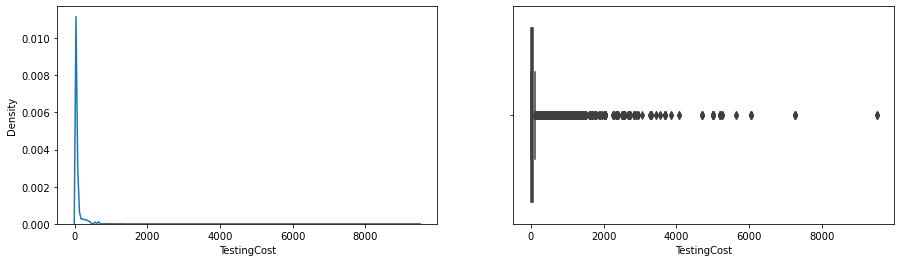

In [1207]:
fig, ax = plt.subplots(1,2,figsize=(15, 4))
sns.kdeplot(data=df_transactional, x="TestingCost", ax=ax[0])
sns.boxplot(data=df_transactional, x="TestingCost", ax=ax[1])

<AxesSubplot:xlabel='Age'>

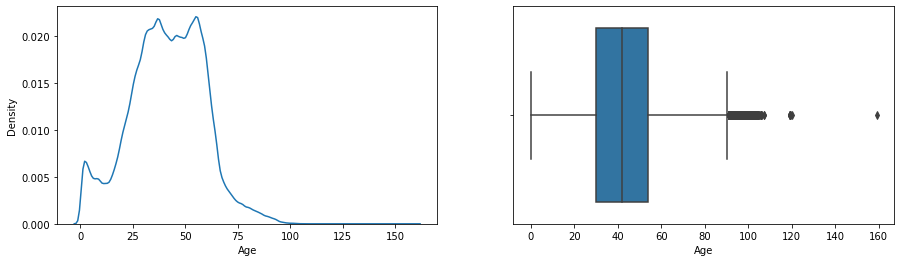

In [1208]:
fig, ax = plt.subplots(1,2,figsize=(15, 4))
sns.kdeplot(data=df_transactional, x="Age", ax=ax[0])
sns.boxplot(data=df_transactional, x="Age", ax=ax[1])

Como vemos, claramente temos outliers na unica coluna numérica presente neste dataframe, logo será necessário remove-los

In [1209]:
df_transactional["zscore"] = stats.zscore(df_transactional["TestingCost"])
df_transactional = df_transactional[(df_transactional["zscore"] < 1)&(df_transactional["zscore"] > -1)]

In [1210]:
df_transactional.describe()

,TestingCost,Age,zscore
count,2192392.00,2192392.00,2192392.00
mean,31.83,41.64,-0.20
std,29.70,17.30,0.30
min,0.00,0.00,-0.52
25%,10.00,30.00,-0.42
50%,19.00,42.00,-0.33
75%,42.00,54.00,-0.09
max,149.00,120.00,1.00


In [1211]:
#df_transactional = df_transactional[df_transactional["Age"] <= 110]
df_transactional["zscore"] = stats.zscore(df_transactional["Age"])
df_transactional = df_transactional[(df_transactional["zscore"] < 3)&(df_transactional["zscore"] > -3)]
df_transactional = df_transactional.drop(columns=["zscore"])

Como vemos ainda temos dados de idade claramente errados, com idades de 159 anos, por isso também faremos uma remoção dos outliers

<AxesSubplot:xlabel='Age'>

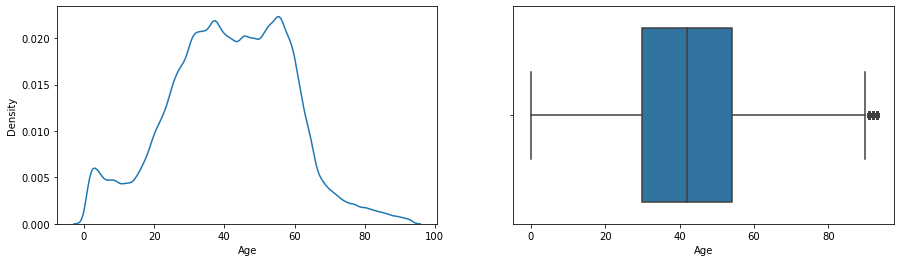

In [1212]:
fig, ax = plt.subplots(1,2,figsize=(15, 4))
sns.kdeplot(data=df_transactional, x="Age", ax=ax[0])
sns.boxplot(data=df_transactional, x="Age", ax=ax[1])

<AxesSubplot:xlabel='TestingCost'>

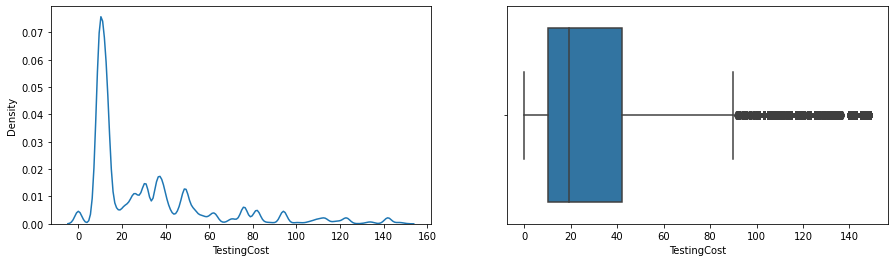

In [1213]:
fig, ax = plt.subplots(1,2,figsize=(15, 4))
sns.kdeplot(data=df_transactional, x="TestingCost", ax=ax[0])
sns.boxplot(data=df_transactional, x="TestingCost", ax=ax[1])

In [1214]:
df_transactional.describe()

,TestingCost,Age
count,2189658.00,2189658.00
mean,31.84,41.57
std,29.70,17.20
min,0.00,0.00
25%,10.00,30.00
50%,19.00,42.00
75%,42.00,54.00
max,149.00,93.00


### Correção do index

In [1215]:
df_transactional = df_transactional.reset_index(drop=True)

# Data analisys

## Atribuição dos dados demográficos e econômicos às clinicas

Para entender melhor sobre cada uma das clinicas presentes na base, iremos fazer um join do dataframe df_geocode com o dataframe df_demographic e df_economic, para ser possível vizualizar os dados demográficos e econômicos do zip code onde está localizado cada clinica

In [1216]:
df_demographic['GeographicAreaName'] = df_demographic['GeographicAreaName'].str.split(' ', expand=True)[1]
df_demographic=df_demographic.rename(columns = {'GeographicAreaName':'Zipcode'})
 
df_economic['GeographicAreaName'] = df_economic['GeographicAreaName'].str.split(' ', expand=True)[1]
df_economic=df_economic.rename(columns = {'GeographicAreaName':'Zipcode'})


In [1217]:
df_demographic.head()

,Id,Zipcode,TotalPopulation,SexRatiomalesper100females,PopulationUnder5Years,Population5to9Years,Population10to14Years,Population15to19Years,Population20to24Years,Population25to34Years,Population35to44Years,Population45to54Years,Population55to59Years,Population60to64Years,Population65to74Years,Population75to84Years,Population85YearsAndOver,MedianAgeInYears
0,8600000US35004,35004,12045,94.10,805,1075,898,477,578,2088,1628,1200,886,683,1017,534,176,35.50
1,8600000US35005,35005,7344,86.10,504,453,511,499,214,788,795,968,612,561,798,485,156,44.00
2,8600000US35006,35006,2883,108.20,96,153,303,129,156,183,367,430,296,260,280,201,29,47.20
3,8600000US35007,35007,26332,95.00,1936,1992,1837,1762,1376,3119,3849,3907,1665,1323,2096,1106,364,37.70
4,8600000US35010,35010,20613,90.50,1306,1465,944,1217,1128,2513,2106,2950,1512,1472,2421,1155,424,42.60


In [1218]:
df_economic.head()

,Id,Zipcode,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore
0,8600000US35004,35004,198,71,298,513,647,1117,529,945,245,61
1,8600000US35005,35005,188,184,318,293,353,562,299,407,67,26
2,8600000US35006,35006,71,20,117,104,154,176,124,194,51,7
3,8600000US35007,35007,396,208,670,462,1173,1854,1578,2224,473,254
4,8600000US35010,35010,700,610,1093,957,1056,1512,807,749,254,249


In [1219]:
df_geocode.head()

,LabId,Address,Zipcode,Latitude,Longitude
0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096",30096,34.00,-84.16
1,L520,"1614 N JAMES ST, ROME, NY 13440",13440,43.23,-75.44
2,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034",98034,47.72,-122.18
3,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342",30342,33.91,-84.35
4,L545,"1204 IL HWY 164, OQUAWKA, IL 61469",61469,40.93,-90.94


In [1220]:
df_geocode = df_geocode.merge(df_demographic, on='Zipcode', how='left') # Fazendo o join com o dataframe dos valores demográficos
df_geocode = df_geocode.merge(df_economic, on='Zipcode', how='left') # Fazendo o join com o dataframe dos valores econômicos
df_geocode = df_geocode.drop(columns=["Id_y"]) # Dropando uma das colunas id, pois foi duplicada
df_geocode = df_geocode.rename(columns = {'Id_x':'Id'}) # Renomeando a outra coluna Id

In [1221]:
df_geocode.loc[:, df_geocode.isna().any()]

,Id,TotalPopulation,SexRatiomalesper100females,PopulationUnder5Years,Population5to9Years,Population10to14Years,Population15to19Years,Population20to24Years,Population25to34Years,Population35to44Years,...,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore
0,8600000US30096,68691.00,89.00,4335.00,4376.00,4749.00,4130.00,4874.00,11188.00,9629.00,...,1277.00,1020.00,2214.00,2771.00,3809.00,5563.00,3485.00,3025.00,1233.00,1428.00
1,8600000US13440,41014.00,104.20,2673.00,2497.00,2254.00,1832.00,2360.00,6157.00,4432.00,...,1227.00,842.00,1804.00,1798.00,1961.00,3345.00,1908.00,2095.00,779.00,502.00
2,8600000US98034,43471.00,98.80,2813.00,2485.00,2426.00,1846.00,2392.00,8207.00,6852.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8600000US30342,30873.00,94.00,1963.00,2322.00,2150.00,1701.00,1638.00,6419.00,4496.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8600000US61469,2213.00,101.90,46.00,71.00,142.00,143.00,152.00,195.00,214.00,...,16.00,72.00,133.00,108.00,175.00,287.00,112.00,107.00,10.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,8600000US13421,13149.00,90.60,852.00,840.00,698.00,684.00,541.00,1875.00,1270.00,...,495.00,222.00,540.00,480.00,786.00,1119.00,509.00,929.00,192.00,132.00
115,8600000US13304,1617.00,95.80,51.00,124.00,86.00,52.00,91.00,103.00,219.00,...,21.00,21.00,67.00,62.00,77.00,60.00,129.00,64.00,103.00,93.00
116,8600000US52806,28288.00,85.80,2111.00,1991.00,2127.00,1519.00,1476.00,4062.00,3282.00,...,643.00,581.00,1249.00,907.00,1668.00,2089.00,1435.00,1639.00,451.00,226.00


In [1113]:
df_geocode

,LabId,Address,Zipcode,Latitude,Longitude,Id,TotalPopulation,SexRatiomalesper100females,PopulationUnder5Years,Population5to9Years,...,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore
0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096",30096,34.00,-84.16,8600000US30096,68691.00,89.00,4335.00,4376.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,L520,"1614 N JAMES ST, ROME, NY 13440",13440,43.23,-75.44,8600000US13440,41014.00,104.20,2673.00,2497.00,...,1227.00,842.00,1804.00,1798.00,1961.00,3345.00,1908.00,2095.00,779.00,502.00
2,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034",98034,47.72,-122.18,8600000US98034,43471.00,98.80,2813.00,2485.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342",30342,33.91,-84.35,8600000US30342,30873.00,94.00,1963.00,2322.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,L545,"1204 IL HWY 164, OQUAWKA, IL 61469",61469,40.93,-90.94,8600000US61469,2213.00,101.90,46.00,71.00,...,16.00,72.00,133.00,108.00,175.00,287.00,112.00,107.00,10.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,L886,"1819 MARLTON PIKE W., CHERRY HILL, NJ 08002",8002,39.92,-75.04,<NA>,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,L535,"603 SENECA ST 4, ONEIDA, NY 13421",13421,43.08,-75.65,8600000US13421,13149.00,90.60,852.00,840.00,...,495.00,222.00,540.00,480.00,786.00,1119.00,509.00,929.00,192.00,132.00
115,L723,"8052 STATE ROUTE 12, BARNEVELD, NY 13304",13304,43.25,-75.19,8600000US13304,1617.00,95.80,51.00,124.00,...,21.00,21.00,67.00,62.00,77.00,60.00,129.00,64.00,103.00,93.00
116,L163,"3906 LILLIE AVE STE 3, DAVENPORT, IA 52806",52806,41.56,-90.59,8600000US52806,28288.00,85.80,2111.00,1991.00,...,643.00,581.00,1249.00,907.00,1668.00,2089.00,1435.00,1639.00,451.00,226.00


In [1108]:
# Corrigindo os tipos dos dados após o join

cols = ['TotalPopulation','PopulationUnder5Years', 
       'Population5to9Years', 'Population10to14Years',
       'Population15to19Years', 'Population20to24Years',
       'Population25to34Years', 'Population35to44Years',
       'Population45to54Years', 'Population55to59Years',
       'Population60to64Years', 'Population65to74Years',
       'Population75to84Years', 'Population85YearsAndOver',
       'TotalHouseholds_LessThan$10.000', 'TotalHouseholds_$10.000to$14.999',
       'TotalHouseholds_$15.000to$24.999', 'TotalHouseholds_$25.000to$34.999',
       'TotalHouseholds_$35.000to$49.999', 'TotalHouseholds_$50.000to$74.999',
       'TotalHouseholds_$75.000to$99.999', 'TotalHouseholds_$100.000to$149.999',
       'TotalHouseholds_$150.000to$199.999', 'TotalHouseholds_$200.000OrMore']
df_geocode[cols] = df_geocode[cols].astype("int64")

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
df_geocode.head()

,LabId,Address,Zipcode,Latitude,Longitude,Id,TotalPopulation,SexRatiomalesper100females,PopulationUnder5Years,Population5to9Years,...,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore
0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096",30096.0,34.00,-84.16,<NA>,<NA>,NaN,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,L520,"1614 N JAMES ST, ROME, NY 13440",13440.0,43.23,-75.44,<NA>,<NA>,NaN,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034",98034.0,47.72,-122.18,<NA>,<NA>,NaN,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342",30342.0,33.91,-84.35,<NA>,<NA>,NaN,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,L545,"1204 IL HWY 164, OQUAWKA, IL 61469",61469.0,40.93,-90.94,<NA>,<NA>,NaN,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


## Definição do lucro dos hospitais

Como podemos verificar, o df_tests descreve os detalhes a respeito de cada exame realizado no df_transactional. Em vista disso iremos fazer um join , para obtermos cada detalhe a respeito dos exames realizados 

In [ ]:
df_transactional.head(2)

,PatientId,Gender,Dateofbirth,Dateofservice,ServiceId,LabId,CodItem,TestingCost
0,10210830256-BIO003,F,1976-01-08,2019-01-07,571904533475-38,L133,70003237,9.0
1,10210830256-BIO003,F,1976-01-08,2019-01-07,571904533475-38,L133,70000638,13.0


In [ ]:
df_tests.head(2)

,CodItem,DescItem,Category,Family,Speciality,TestingCost
0,70003237,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
1,70000638,"HEMOGRAMA, AUTOMATIZADO, SANGUE",CA,HEMATO,BLOOD COUNT,2.46


In [ ]:
df_transactional = df_transactional.merge(df_tests,on="CodItem",how="left")

In [ ]:
df_transactional.head(2)

,PatientId,Gender,Dateofbirth,Dateofservice,ServiceId,LabId,CodItem,TestingCost_x,DescItem,Category,Family,Speciality,TestingCost_y
0,10210830256-BIO003,F,1976-01-08,2019-01-07,571904533475-38,L133,70003237,9.0,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
1,10210830256-BIO003,F,1976-01-08,2019-01-07,571904533475-38,L133,70000638,13.0,"HEMOGRAMA, AUTOMATIZADO, SANGUE",CA,HEMATO,BLOOD COUNT,2.46


Como podemos verificar, a coluna "TestingCost" foi duplicada. Noto que no df_transactional que descreve os serviços realizados, a coluna "TestingCost" já descreve o preço final daquele serviço especifico, que é custeado pelo cliente. No df_tests observo que a coluna descreve o custo do serviço, só que para o laboratório.

In [ ]:
# Renomeando 
df_transactional = df_transactional.rename(columns = {'TestingCost_x':'FinalCost'}) 
df_transactional = df_transactional.rename(columns = {'TestingCost_y':'ServiceCost'}) 

In [ ]:
df_transactional[df_transactional.CodItem == 70003237]

,PatientId,Gender,Dateofbirth,Dateofservice,ServiceId,LabId,CodItem,FinalCost,DescItem,Category,Family,Speciality,ServiceCost
0,10210830256-BIO003,F,1976-01-08,2019-01-07,571904533475-38,L133,70003237,9.0,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
185,10225666807-BIO002,F,1968-07-16,2019-01-15,573103867832-51,L139,70003237,9.0,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
1938,571700011536-BIO002,F,1961-04-17,2019-01-04,571706608210-36,L131,70003237,9.0,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
2076,574400001820-BIO002,F,1966-01-04,2019-01-17,574400919309-64,L150,70003237,9.0,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
2317,10210855836-BIO003,F,1980-12-25,2019-02-08,575007148185-72,L155,70003237,9.0,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339577,7660041997-1,F,1982-01-02,2021-01-07,7660041997-2-1,L133,70003237,9.0,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
2339687,7658359040-1,F,1981-02-24,2021-01-10,7658359040-2-1,L540,70003237,9.0,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
2340208,7659135953-1,M,1960-08-06,2021-01-10,7659135953-9-1,L145,70003237,9.0,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
2340334,6174746593-1,M,1984-09-01,2021-01-27,6174746593-3-1,L141,70003237,9.0,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78


Em vista disso, agora iremos calcular o lucro que a clinica obteve por aquele serviço específico

In [ ]:
df_transactional["Profit"] = df_transactional["FinalCost"] - df_transactional["ServiceCost"] 

Agora faremos uma agregação, pois como é possível observar abaixo cada linha descreve um item e ou preocedimento que foi utilizado/realizado por um cliente específico, e com essa agregação poderemos ver quanto foi o lucro total da instituição naquele serviço com cada paciente

In [ ]:
pd.DataFrame(df_transactional.DescItem.unique())

,0
0,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT..."
1,"HEMOGRAMA, AUTOMATIZADO, SANGUE"
2,"FERRITINA, SORO"
3,"FERRO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE ..."
4,"CALCIO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE..."
...,...
1993,POLIMORFISMO CY2C9*2 E CYP2*3 - TESTE DE SENSI...
1994,"GENES BRCA1 E BRCA2, MLPA, SANGUE"
1995,"HEMOFILIA A, ANALISE DO DNA, SEQUENCIAMENTO, S..."
1996,"INSULINA, SORO, 90 MIN APOS XXX"


In [ ]:
df_transactional.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2340722 entries, 0 to 2340721
Data columns (total 14 columns):
 #   Column         Dtype         
---  ------         -----         
 0   PatientId      string        
 1   Gender         string        
 2   Dateofbirth    datetime64[ns]
 3   Dateofservice  datetime64[ns]
 4   ServiceId      string        
 5   LabId          string        
 6   CodItem        Int64         
 7   FinalCost      Float64       
 8   DescItem       string        
 9   Category       string        
 10  Family         string        
 11  Speciality     string        
 12  ServiceCost    float64       
 13  Profit         Float64       
dtypes: Float64(2), Int64(1), datetime64[ns](2), float64(1), string(8)
memory usage: 274.6 MB


In [ ]:
df_transactional.groupby(['PatientId', 'Gender', 'Dateofbirth', 'Dateofservice', 'ServiceId',
       'LabId', 'CodItem','DescItem', 'Category', 'Family',
       'Speciality'],as_index=False)["Profit"].sum()

,PatientId,Gender,Dateofbirth,Dateofservice,ServiceId,LabId,CodItem,DescItem,Category,Family,Speciality,Profit
0,-2,I,1900-01-01,2019-02-22,532800338922-132,L069,70003759,"PROTROMBINA, TEMPO, ATIVIDADE,RNI, PLASMA",CA,HEMATO,COAGULATION,10.1
1,-2,I,1900-01-01,2019-04-04,573200638885-52,L140,70000301,"CREATINA, URINA DE 24 HORAS (EXEMPLO DE EXPRES...",CA,CORELAB,BIOCHEMISTRY,8.1
2,-2,I,1900-01-01,2019-04-04,573200638885-52,L140,70001276,"COLESTEROL, DOSAGEM DE ESTERES, SORO",CA,CORELAB,BIOCHEMISTRY,36.29
3,-2,I,1900-01-01,2019-04-04,573200638885-52,L140,70002619,"ACIDO URICO (URATO), SORO (EXEMPLO DE EXPRESSA...",CA,CORELAB,BIOCHEMISTRY,11.18
4,-2,I,1900-01-01,2019-04-04,573200638885-52,L140,70003200,"UREIA, SORO (EXEMPLO DE EXPRESSAO DE RESULTADO...",CA,CORELAB,BIOCHEMISTRY,7.62
...,...,...,...,...,...,...,...,...,...,...,...,...
2340426,9999999-1,F,2010-01-01,2019-07-17,9999999-2790-1,L121,70005139,"BACTERIAS, ANTIBIOGRAMA AUTOMATIZADO",CA,MICROBIO,CULTURE,-7.87
2340427,9999999-1,F,2010-01-01,2019-07-17,9999999-2791-1,L139,70002374,"IDENTIFICACAO DE BACTERIAS, DIVERSOS (XXX), CU...",CA,MICROBIO,BACTEROSCOPY,22.79
2340428,9999999-1,F,2010-01-01,2019-07-17,9999999-2791-1,L139,70004185,"ROTINA DE URINA (CARACTERES FISICOS, ELEMENTOS...",CA,URINE,ROUTINE,10.61
2340429,9999999-1,F,2010-01-01,2019-07-17,9999999-2791-1,L139,70004964,"IDENTIFICACAO DE BACTERIAS, URINA JATO MEDIO, ...",CA,MICROBIO,UROCULTURE,17.56


In [ ]:
df_tests.head()

,CodItem,DescItem,Category,Family,Speciality,TestingCost
0,70003237,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
1,70000638,"HEMOGRAMA, AUTOMATIZADO, SANGUE",CA,HEMATO,BLOOD COUNT,2.46
2,70001597,"FERRITINA, SORO",CA,CORELAB,IMMUNOHORMONE,2.11
3,70000103,"FERRO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE ...",CA,CORELAB,BIOCHEMISTRY,0.80
4,70000224,"CALCIO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE...",CA,CORELAB,BIOCHEMISTRY,1.02


In [ ]:
#df_transactional.groupby(["PatientId","Gender","Dateofbirth","Dateofservice","ServiceId","LabId","CodItem"],as_index=False).sum()

In [ ]:
#df_transactional["AgeInService"] = df_transactional["Dateofservice"] - df_transactional["Dateofbirth"]
#df_transactional["AgeInService"] = df_transactional["AgeInService"]/np.timedelta64(1, 'Y')
#df_transactional["AgeInService"] = df_transactional["AgeInService"].astype("int64")

#d4 = df_tests